# Notebook 9: Map for 'Naughty & Nice' Article

In [46]:
#import necessary things
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import json
import numpy as np
from IPython.display import display, HTML, IFrame
import folium
import plotly.express as px
import plotly
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

## Import Data

In [2]:
yr2017_df = pd.read_csv('../data/properties_reported_2017.csv')

## Clean Data

In [3]:
#get rid of duplicate building ID and non-numerics
def clean_dataframe(yr2017_df):
    uniques = yr2017_df.drop_duplicates(subset=['opa_account_num'])
    return uniques.assign(building_id=pd.to_numeric(uniques['opa_account_num'], errors='coerce')).dropna(subset=['building_id'])


In [4]:
clean_dataframe(yr2017_df)

,electricity_use_kbtu,objectid,street_address,property_name,opa_account_num,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,...,natural_gas_use_kbtu,fuel_oil_o2_use_kbtu,steam_use_kbtu,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes,building_id
0,2310408.2,3589,1100 CATHARINE ST,Palumbo,781043800,19147,1,1980,K-12 School,185206.0,...,407768.5,4970622.0,NaN,97.0,41.5,68.6,672.8,646.8,NaN,781043800.0
1,23297409.0,4560,4100 CITY AVE,WPVI-TV,883080200,19131,1,2009,Office,69698.0,...,1242178.2,NaN,NaN,1.0,352.1,1068.3,2322.0,2650.4,NaN,883080200.0
2,NaN,4573,4343 WHITAKER AVE,ECI Building,884184500,19124,1,1950,Distribution Center,93000.0,...,663312.3,NaN,NaN,100.0,7.1,7.5,68.1,35.2,NaN,884184500.0
3,4749439.2,4153,3801 MARKET ST,First District Plaza,883805600,19104,1,1986,Other,87830.0,...,432235.7,NaN,NaN,NaN,59.3,175.9,1838.1,549.8,NaN,883805600.0
4,1168752.3,3450,1100 TYSON AVE,Moore,786543400,19111,1,1980,K-12 School,67701.0,...,3762754.7,NaN,NaN,32.0,72.8,112.6,1456.4,329.5,NaN,786543400.0
5,1569666.7,3519,1660 COMLY ST,Ziegler,786076410,19149,1,1956,K-12 School,59025.0,...,2350806.1,NaN,NaN,72.0,66.4,125.3,1381.6,299.0,NaN,786076410.0
6,3216953.0,3794,5600-54 VINE ST,Daroff,783541800,19139,1,1972,K-12 School,85080.0,...,2866908.9,NaN,NaN,53.0,71.5,154.1,1656.7,509.1,NaN,783541800.0
7,1190593.2,3453,2600-20 N BROAD ST,Garage - Broad St,884073907,19132,1,1980,Parking,128600.0,...,8649804.7,NaN,NaN,NaN,76.5,99.7,695.5,591.5,NaN,884073907.0
8,143478.2,3135,3501 CEDAR ST,Kawin LLC,882059600,19134,2,1983,Strip Mall,52495.0,...,NaN,NaN,NaN,NaN,2.7,8.6,3.7,15.9,NaN,882059600.0
9,1918311.7,3537,11550 E ROOSEVELT BLVD,RAMADA,883763500,19116,1,1964,Hotel,64796.0,...,1433527.2,NaN,NaN,31.0,51.7,116.2,4190.6,288.9,NaN,883763500.0


In [5]:
#check to see it worked
yr2017_df.sample(10)

,electricity_use_kbtu,objectid,street_address,property_name,opa_account_num,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,portfolio_manager_id,natural_gas_use_kbtu,fuel_oil_o2_use_kbtu,steam_use_kbtu,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes
1379,8537448.4,4521,200-32 S 40TH ST,Hamilton Village,882937900,19104,1,1974,Mixed Use Property,82452.0,1585726,210966.1,NaN,NaN,NaN,106.1,327.8,3603.9,958.3,NaN
657,5304387.3,4036,2722 COMMERCE WAY,Select Nutrition Distributors,884292596,19154,1,2000,Distribution Center,110000.0,4083183,1924467.8,NaN,NaN,31.0,65.7,169.8,380.8,690.6,NaN
1181,81524.8,3155,2101 E VENANGO ST,Active Radiator,884201700,19134,1,1921,Manufacturing/Industrial Plant,65000.0,4099796,5273158.6,NaN,NaN,NaN,82.4,89.1,301.2,289.1,NaN
920,1270588.5,3427,5300 WHITAKER AVE,Jomar Textiles. Inc.,882885808,19124,1,1960,Other,93650.0,3776479,NaN,NaN,NaN,NaN,13.6,42.6,200.7,140.9,NaN
938,1214852.8,3461,1039-55 FRANKFORD AVE,Frankford Lofts,881006090,19125,1,1930,Multifamily Housing,52000.0,4989748,NaN,NaN,NaN,83.0,23.4,73.4,789.2,134.8,NaN
1517,NaN,4053,7700-80 CRITTENDEN ST,2833-Crittenden Avenue,882040300,19118,1,1972,Supermarket/Grocery Store,48210.0,3892162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1111,6510444.0,3769,3500-06 MARKET ST,Monell Chemical Senses Center,773702000,19104,1,1970,Laboratory,60000.0,3667296,NaN,NaN,7898569.2,NaN,240.2,499.1,2223.2,1246.7,NaN
1209,535826.6,3243,5601-07 TULIP ST,A & R Investment,884177700,19124,1,1920,Manufacturing/Industrial Plant,139329.0,5945395,400336.0,NaN,NaN,NaN,6.7,15.1,106.4,80.7,NaN
11,925771.1,3304,1700 BIGLER ST,Bregy,782008600,19145,1,1923,K-12 School,66000.0,4123951,4373857.0,NaN,NaN,57.0,80.3,113.6,618.7,335.0,NaN
832,18253517.6,4423,1801 N 5TH ST,Honor Foods,884080210,19122,1,1983,Refrigerated Warehouse,94500.0,3851366,58407.3,NaN,NaN,2.0,193.8,607.2,1411.0,2028.0,NaN


In [6]:
cleaned_postal_codes = yr2017_df['postal_code'].str.replace(r'-.+', '').map(int)
#replace anything after the dash (including the dash) with the empty string to get all the zipcodes uniform

Now subset dataframe to just the best and worst buildings in terms of energy efficiency
* Best: '0-10' energy STAR score
* Worst: '91-100' energy STAR Score

In [7]:
yr2017_df['energy_star_group'] = pd.cut(yr2017_df['energy_star_score'], bins=10, labels = ['0-10','11-20', '21-30', '31-40','41-50','51-60','61-70','71-80','81-90','91-100'])

In [8]:
best_and_worst = yr2017_df[yr2017_df['energy_star_group'].isin(['91-100','0-10'])]

In [9]:
print(len(best_and_worst)) #281 in the best and worst

281


## Lookup Lat and Long for my buildings

In [10]:
geolocator = Nominatim(user_agent='application')
lookup = RateLimiter(geolocator.geocode, min_delay_seconds=1)

results = []


#create a code that allows the look-up to run more smoothly with try and except for the errors
for opa_account_num, street, zip_code in clean_dataframe(best_and_worst)[['opa_account_num', 'street_address', 'postal_code']].values[:281]:
    address = f'{street.title()}, PA {zip_code}'
    location = lookup(address, language='en', exactly_one=True)
    
    if location is not None:
        results.append([opa_account_num, location.latitude, location.longitude])
    
    else:
        print(f'Could not find lat/long for address {address}')

Could not find lat/long for address 3401-15 Market St, PA 19104
Could not find lat/long for address 3401-41 N Broad St, PA 19140
Could not find lat/long for address 2100-12 Arch St, PA 19103
Could not find lat/long for address 800-34 Walnut St 3, PA 19106
Could not find lat/long for address 3600-90 Walnut St, PA 19104
Could not find lat/long for address 1631-37 Arch St, PA 19103
Could not find lat/long for address 3521-35 Market St, PA 19104
Could not find lat/long for address 5720-38 Media St, PA 19131
Could not find lat/long for address 2514-32 Emerald St, PA 19125
Could not find lat/long for address 2825-45 Southampton Rd, PA 19154
Could not find lat/long for address 5501-09 Wayne Ave, PA 19144
Could not find lat/long for address 5101-03 Haverford Ave, PA 19139
Could not find lat/long for address 7205-15 Rising Sun Ave, PA 19111
Could not find lat/long for address 1426-44 N 6Th St, PA 19122
Could not find lat/long for address 1801-59 N American St, PA 19122
Could not find lat/long f

In [11]:
result_df = pd.DataFrame(results, columns=['building_id', 'lat', 'lng'])



In [12]:
#set index to building ID to be able to put the long and lat results back into the dataframe 
result_df.set_index('building_id')

,lat,lng
building_id,,
781043800,39.940224,-75.162107
883080200,40.004934,-75.218439
884184500,40.014910,-75.117933
775329000,41.333774,-80.178551
888071440,39.947197,-75.167183
883702100,39.951560,-75.164195
773009000,39.949948,-75.194096
771005500,39.946949,-75.153287
883703900,39.948903,-75.169482


In [13]:
#create map that changes opa-account-num to building id
column_mapping = {
    'philadelphia_building_id': 'building_id',
    'opa_account_num': 'building_id',
    'location_1_address': 'street_address'
}

In [14]:
#rename column ID 'opa account num' to 'building_id' so that the index match will work 
best_and_worst = best_and_worst.rename(columns=column_mapping)

In [15]:
best_and_worst.set_index('building_id')

,electricity_use_kbtu,objectid,street_address,property_name,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,portfolio_manager_id,natural_gas_use_kbtu,fuel_oil_o2_use_kbtu,steam_use_kbtu,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes,energy_star_group
building_id,,,,,,,,,,,,,,,,,,,,
781043800,2310408.2,3589,1100 CATHARINE ST,Palumbo,19147,1,1980,K-12 School,185206.0,3330829,407768.5,4970622.0,NaN,97.0,41.5,68.6,672.8,646.8,NaN,91-100
883080200,23297409.0,4560,4100 CITY AVE,WPVI-TV,19131,1,2009,Office,69698.0,3681504,1242178.2,NaN,NaN,1.0,352.1,1068.3,2322.0,2650.4,NaN,0-10
884184500,NaN,4573,4343 WHITAKER AVE,ECI Building,19124,1,1950,Distribution Center,93000.0,3956329,663312.3,NaN,NaN,100.0,7.1,7.5,68.1,35.2,NaN,91-100
775329000,407853.4,3192,1330 VERNON RD,St. Raymond of Penafort,19150,2,1950,K-12 School,61900.0,3736431,NaN,NaN,NaN,100.0,6.6,20.7,953.6,45.2,NaN,91-100
883072000,6019894.0,3761,3401-15 MARKET ST,3401 Market St.,19104,1,1930,Office,90817.0,3325211,268111.9,NaN,1.818209e+07,1.0,269.4,452.1,1073.6,1889.3,NaN,0-10
888071440,7051007.2,4290,1512-14 SPRUCE ST,The Drake,19102,1,1929,Multifamily Housing,177067.0,4936576,1871879.9,NaN,1.588235e+07,3.0,140.1,244.0,10288.0,1936.2,NaN,0-10
883702100,20229017.8,4504,1400 S PENN SQ,73R49-Philadelphia Ritz Carlton,19102,2,1990,Hotel,350000.0,3351793,2670999.8,NaN,2.151224e+07,1.0,126.9,263.4,22987.0,3814.3,NaN,0-10
777014000,136877225.0,4514,3401-41 N BROAD ST,TEMPLE UNIVERSITY HOSPITAL SUPERBLOCK,19140,1,2000,Hospital (General Medical & Surgical),855189.0,3997483,223439.2,NaN,1.127025e+08,9.0,292.1,661.4,43735.5,22679.1,NaN,0-10
773009000,259361166.9,4540,3400 SPRUCE ST,Hospital of the University of Pennsylvania,19104,9,1913,Hospital (General Medical & Surgical),1791804.0,2848103,2119816.1,NaN,2.819489e+08,8.0,303.3,645.1,186787.5,47604.7,NaN,0-10


In [16]:
#add an empty lat column 
best_and_worst["lat"] = np.nan

In [17]:
#add an empty lng column
best_and_worst['lng'] = np.nan

In [18]:
#make sure it worked
best_and_worst.head()

,electricity_use_kbtu,objectid,street_address,property_name,building_id,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,...,steam_use_kbtu,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes,energy_star_group,lat,lng
0,2310408.2,3589,1100 CATHARINE ST,Palumbo,781043800,19147,1,1980,K-12 School,185206.0,...,NaN,97.0,41.5,68.6,672.8,646.8,NaN,91-100,NaN,NaN
1,23297409.0,4560,4100 CITY AVE,WPVI-TV,883080200,19131,1,2009,Office,69698.0,...,NaN,1.0,352.1,1068.3,2322.0,2650.4,NaN,0-10,NaN,NaN
2,NaN,4573,4343 WHITAKER AVE,ECI Building,884184500,19124,1,1950,Distribution Center,93000.0,...,NaN,100.0,7.1,7.5,68.1,35.2,NaN,91-100,NaN,NaN
12,407853.4,3192,1330 VERNON RD,St. Raymond of Penafort,775329000,19150,2,1950,K-12 School,61900.0,...,NaN,100.0,6.6,20.7,953.6,45.2,NaN,91-100,NaN,NaN
21,6019894.0,3761,3401-15 MARKET ST,3401 Market St.,883072000,19104,1,1930,Office,90817.0,...,18182092.8,1.0,269.4,452.1,1073.6,1889.3,NaN,0-10,NaN,NaN


In [19]:
#set index for the matching
best_and_worst.set_index('building_id')

,electricity_use_kbtu,objectid,street_address,property_name,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,portfolio_manager_id,...,steam_use_kbtu,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes,energy_star_group,lat,lng
building_id,,,,,,,,,,,,,,,,,,,,,
781043800,2310408.2,3589,1100 CATHARINE ST,Palumbo,19147,1,1980,K-12 School,185206.0,3330829,...,NaN,97.0,41.5,68.6,672.8,646.8,NaN,91-100,NaN,NaN
883080200,23297409.0,4560,4100 CITY AVE,WPVI-TV,19131,1,2009,Office,69698.0,3681504,...,NaN,1.0,352.1,1068.3,2322.0,2650.4,NaN,0-10,NaN,NaN
884184500,NaN,4573,4343 WHITAKER AVE,ECI Building,19124,1,1950,Distribution Center,93000.0,3956329,...,NaN,100.0,7.1,7.5,68.1,35.2,NaN,91-100,NaN,NaN
775329000,407853.4,3192,1330 VERNON RD,St. Raymond of Penafort,19150,2,1950,K-12 School,61900.0,3736431,...,NaN,100.0,6.6,20.7,953.6,45.2,NaN,91-100,NaN,NaN
883072000,6019894.0,3761,3401-15 MARKET ST,3401 Market St.,19104,1,1930,Office,90817.0,3325211,...,1.818209e+07,1.0,269.4,452.1,1073.6,1889.3,NaN,0-10,NaN,NaN
888071440,7051007.2,4290,1512-14 SPRUCE ST,The Drake,19102,1,1929,Multifamily Housing,177067.0,4936576,...,1.588235e+07,3.0,140.1,244.0,10288.0,1936.2,NaN,0-10,NaN,NaN
883702100,20229017.8,4504,1400 S PENN SQ,73R49-Philadelphia Ritz Carlton,19102,2,1990,Hotel,350000.0,3351793,...,2.151224e+07,1.0,126.9,263.4,22987.0,3814.3,NaN,0-10,NaN,NaN
777014000,136877225.0,4514,3401-41 N BROAD ST,TEMPLE UNIVERSITY HOSPITAL SUPERBLOCK,19140,1,2000,Hospital (General Medical & Surgical),855189.0,3997483,...,1.127025e+08,9.0,292.1,661.4,43735.5,22679.1,NaN,0-10,NaN,NaN
773009000,259361166.9,4540,3400 SPRUCE ST,Hospital of the University of Pennsylvania,19104,9,1913,Hospital (General Medical & Surgical),1791804.0,2848103,...,2.819489e+08,8.0,303.3,645.1,186787.5,47604.7,NaN,0-10,NaN,NaN


In [20]:
#import the long and lat back in by filling na -- since the indexes are the same this should work 
mapping_df = best_and_worst[['building_id', 'property_name', 'energy_star_group','energy_star_score', 'lat', 'lng']].fillna(result_df)



In [21]:
#check to see it worked
mapping_df

,building_id,property_name,energy_star_group,energy_star_score,lat,lng
0,781043800,Palumbo,91-100,97.0,39.940224,-75.162107
1,883080200,WPVI-TV,0-10,1.0,40.004934,-75.218439
2,884184500,ECI Building,91-100,100.0,40.014910,-75.117933
12,775329000,St. Raymond of Penafort,91-100,100.0,39.949910,-75.155632
21,883072000,3401 Market St.,0-10,1.0,40.026510,-75.166618
44,888071440,The Drake,0-10,3.0,40.109516,-74.983207
52,883702100,73R49-Philadelphia Ritz Carlton,0-10,1.0,39.989582,-75.145964
54,777014000,TEMPLE UNIVERSITY HOSPITAL SUPERBLOCK,0-10,9.0,40.073585,-75.015609
56,773009000,Hospital of the University of Pennsylvania,0-10,8.0,39.992241,-75.133701
57,771005500,Farm Journal,0-10,5.0,40.020002,-75.086616


In [22]:
#how many buildings could it locate?
print(len(result_df))

222


In [23]:
#how many buildings were lost?
281-222

59

In [24]:
#percentage 
59/281 *100

20.99644128113879

20% or 59 buildings could not be located but this is still good for my map 

## Create the dataframe for the map
My goal for the map is to plot the buildings and color code the plots green vs red for good vs bad efficiency

In [25]:
mapping_gdf=gpd.GeoDataFrame(mapping_df,geometry=gpd.points_from_xy(mapping_df['lng'],mapping_df['lat']))

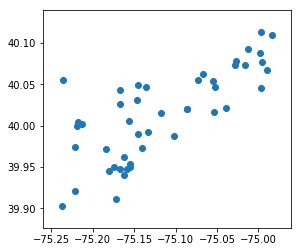

In [26]:
mapping_gdf.plot()

This map does not show anything so let's keep going

In [47]:
fig = px.scatter_mapbox(mapping_gdf, lat="lat", lon="lng", hover_name="property_name", 
                        hover_data=["energy_star_score"],
                        color="energy_star_group", zoom=8, height=300)
fig.update_layout(mapbox_style="stamen-toner")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [41]:
plotly.io.write_html(fig, file='map.html')

In [34]:
IFrame('map.html', width=600, height=600)

### Separating out the best and worst to plot separately

Just in case I need to plot the best and worst separately.

In [42]:
best_plot = mapping_df[mapping_df['energy_star_group'].isin(['91-100'])]

In [43]:
worst_plot = mapping_df[mapping_df['energy_star_group'].isin(['0-10'])]

In [44]:
px.scatter_mapbox(best_plot, lat="lat", lon="lng", hover_name="property_name", hover_data=["energy_star_score"],
                        color_discrete_sequence=["green"], zoom=8, height=300)

In [45]:
px.scatter_mapbox(worst_plot, lat="lat", lon="lng", hover_name="property_name", hover_data=["energy_star_score"],
                        color_discrete_sequence=["red"], zoom=8, height=300)